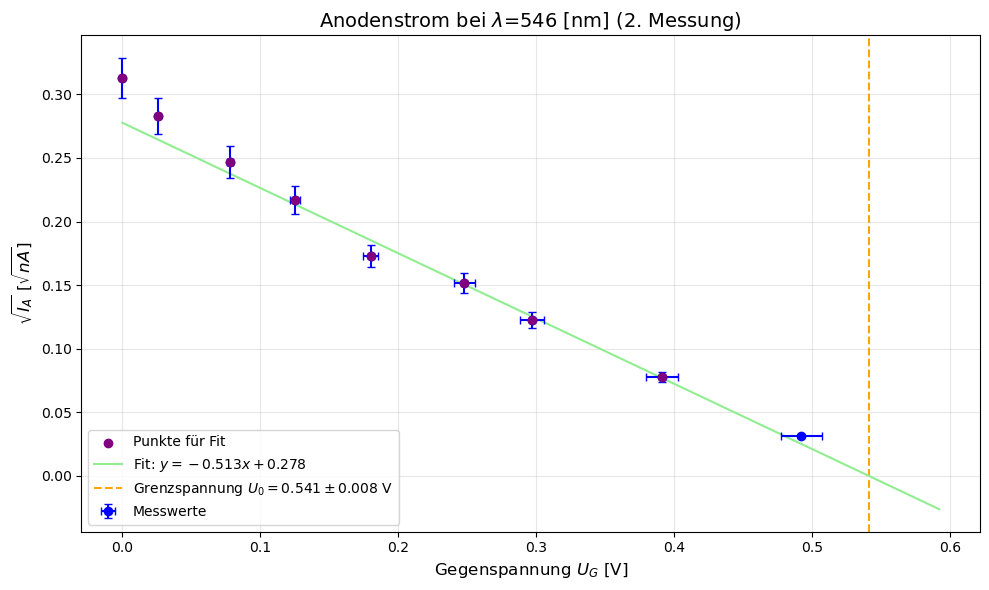

Die Grenzspannung U_0 beträgt: 0.541 ± 0.008 V
Chi-Quadrat-Wert: 9.657
Reduziertes Chi-Quadrat: 1.609


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([0.492,0.391,0.297,0.248,0.18,0.125,0.078,0.026,0])
I_A = np.array([0.001,0.006,0.015,0.023,0.03,0.047,0.061,0.08,0.098])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [1, 2, 3, 4, 5, 6, 7, 8]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=546 [nm] (2. Messung) ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('546_2_photoeffekt_plot_546nm(2_messung).png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


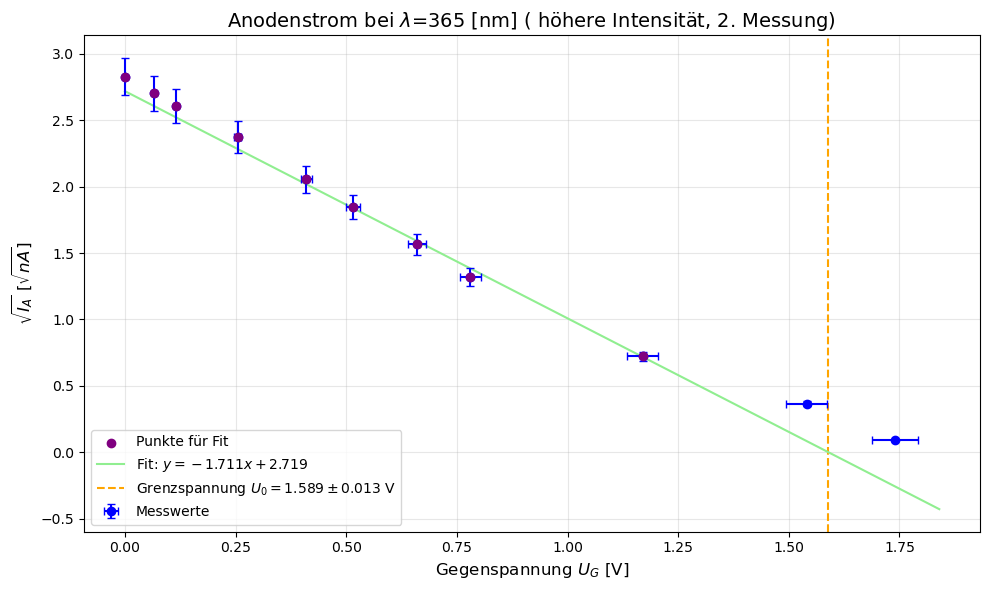

Die Grenzspannung U_0 beträgt: 1.589 ± 0.013 V
Chi-Quadrat-Wert: 3.320
Reduziertes Chi-Quadrat: 0.474


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.74,1.54,1.17,0.78,0.66,0.515,0.41,0.255,0.115,0.066,0])
I_A = np.array([0.008
,0.133
,0.52
,1.74
,2.45
,3.41
,4.22
,5.63
,6.8
,7.3
,8.0])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=365 [nm] ( höhere Intensität, 2. Messung) ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('365_2_hI_photoeffekt_plot_365nm(hoehere_I_2_messung).png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


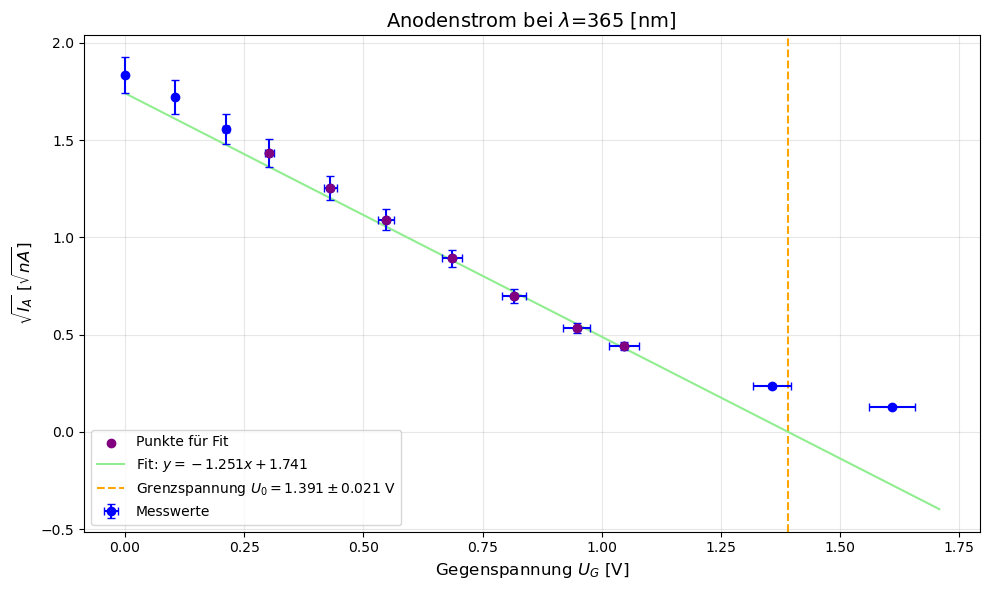

Die Grenzspannung U_0 beträgt: 1.391 ± 0.021 V
Chi-Quadrat-Wert: 3.312
Reduziertes Chi-Quadrat: 0.662


In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.608,1.357,1.046,0.948,0.816,0.686,0.548,0.431,0.303,0.212,0.104,0])
I_A = np.array([0.017,0.056,0.195,0.285,0.490,0.795,1.19,1.57,2.06,2.42,2.96,3.36])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=365 [nm] ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('365_photoeffekt_plot_365nm.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


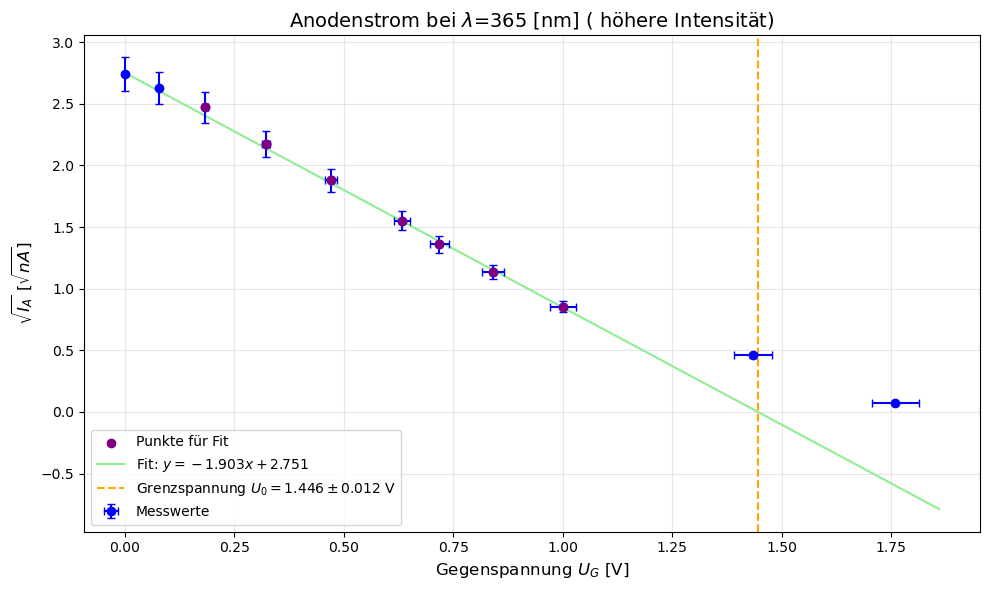

Die Grenzspannung U_0 beträgt: 1.446 ± 0.012 V
Chi-Quadrat-Wert: 0.706
Reduziertes Chi-Quadrat: 0.141


In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.76,1.434,1,0.84,0.718,0.633,0.47,0.322,0.184,0.077,0])
I_A = np.array([0.005,0.21,0.73,1.29,1.85,2.4,3.53,4.72,6.1,6.9,7.5])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=365 [nm] ( höhere Intensität) ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('365_hI_photoeffekt_plot_365nm(hoehere_Intensität.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


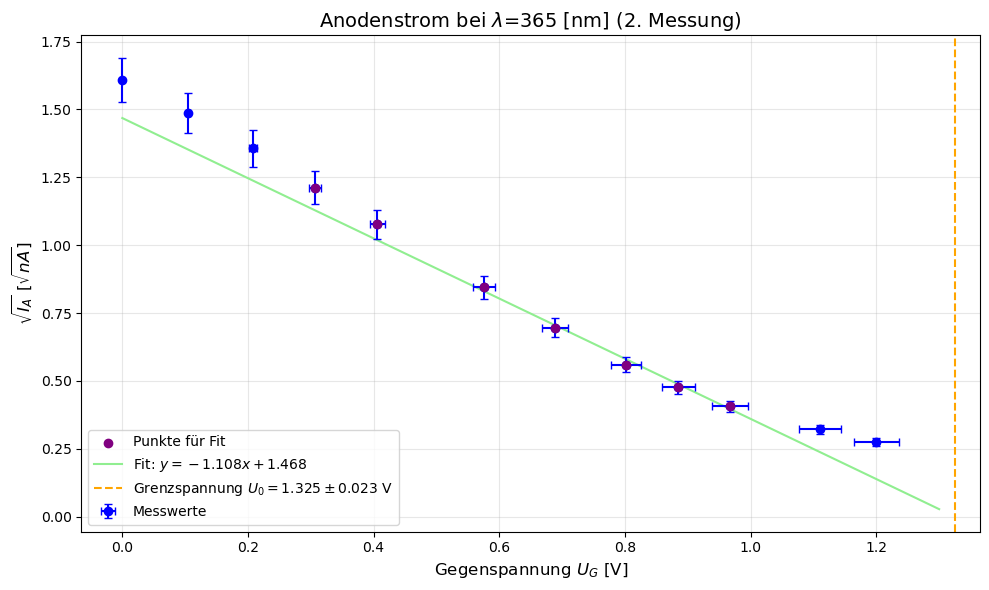

Die Grenzspannung U_0 beträgt: 1.325 ± 0.023 V
Chi-Quadrat-Wert: 4.228
Reduziertes Chi-Quadrat: 0.846


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.2,1.11,0.967,0.885,0.802,0.688,0.576,0.406,0.307,0.208,0.104
,0])
I_A = np.array([0.076,0.104,0.165,0.227,0.314,0.485,0.714,1.16,1.47,1.84,2.21,2.59])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=365 [nm] (2. Messung) ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('365_2_photoeffekt_plot_365nm(2_Messung).png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


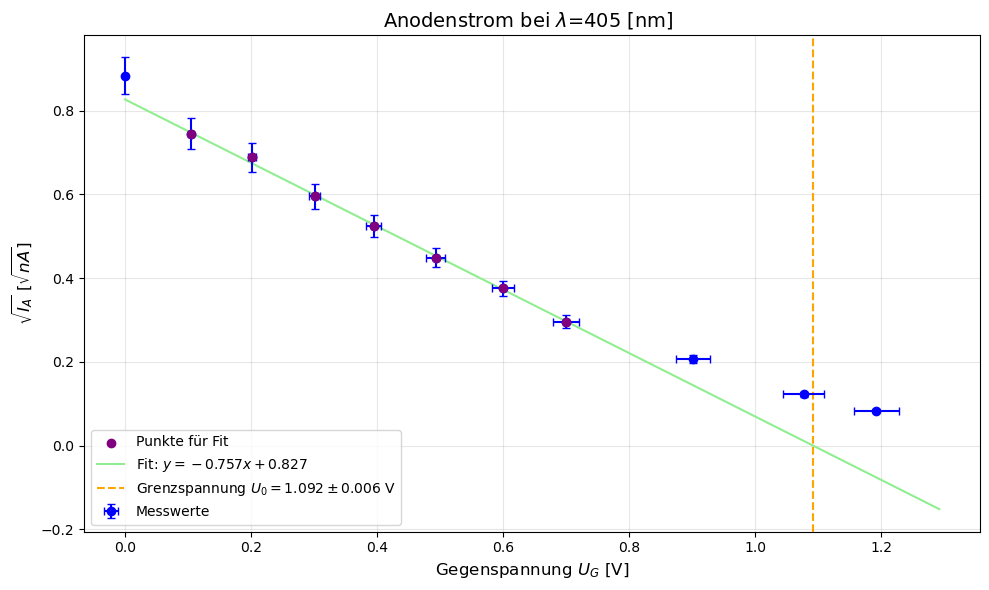

Die Grenzspannung U_0 beträgt: 1.092 ± 0.006 V
Chi-Quadrat-Wert: 0.278
Reduziertes Chi-Quadrat: 0.056


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.192,1.077,0.901,0.7,0.6,0.493,0.395,0.301,0.202,0.105,0])
I_A = np.array([0.007,0.015,0.043,0.088,0.141,0.202,0.276,0.355,0.475,0.555,0.78])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [ 3, 4, 5, 6, 7, 8, 9]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=405 [nm]  ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('405_photoeffekt_plot_405nm.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


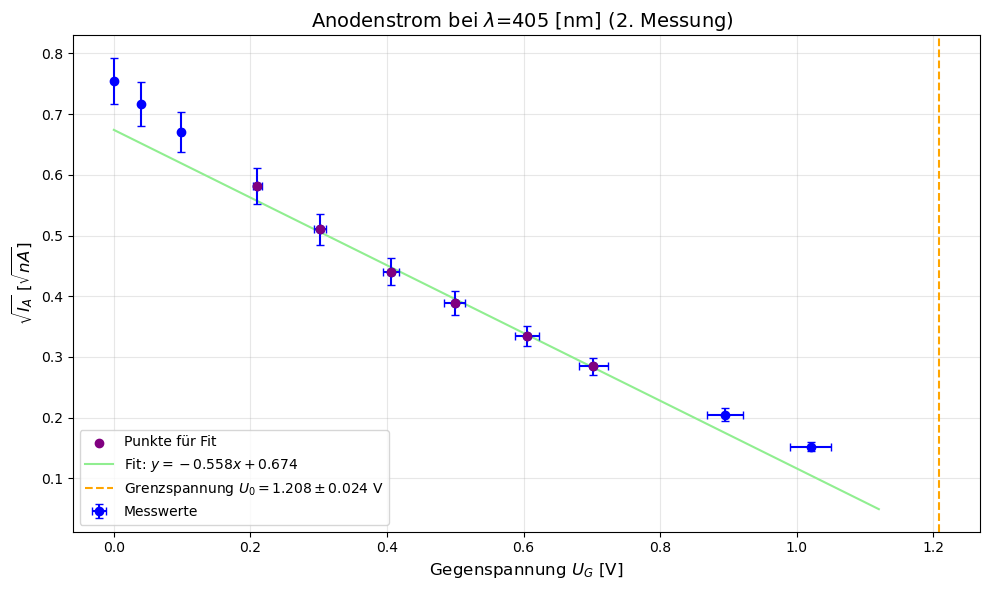

Die Grenzspannung U_0 beträgt: 1.208 ± 0.024 V
Chi-Quadrat-Wert: 1.008
Reduziertes Chi-Quadrat: 0.252


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.02,0.895,0.702,0.605,0.499,0.406,0.302,0.21,0.099,0.04,0])
I_A = np.array([0.023,0.042,0.081,0.112,0.151,0.194,0.260,0.338,0.45,0.514,0.57])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [2, 3, 4, 5, 6, 7]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=405 [nm] (2. Messung)  ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('405_2_photoeffekt_plot_405nm(2_Messung).png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


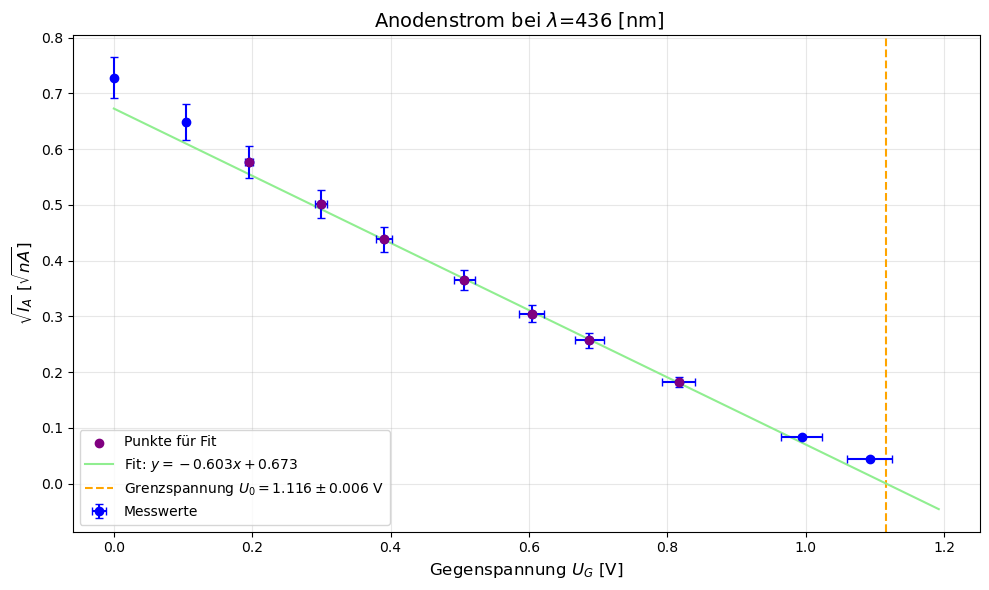

Die Grenzspannung U_0 beträgt: 1.116 ± 0.006 V
Chi-Quadrat-Wert: 0.804
Reduziertes Chi-Quadrat: 0.161


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.092,0.994,0.816,0.687,0.604,0.506,0.390,0.299,0.195,0.104,0])
I_A = np.array([0.002,0.007,0.033,0.066,0.093,0.133,0.192,0.251,0.333,0.42,0.53])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [ 2, 3, 4, 5, 6, 7, 8]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=436 [nm]   ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('436_photoeffekt_plot_436nm.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


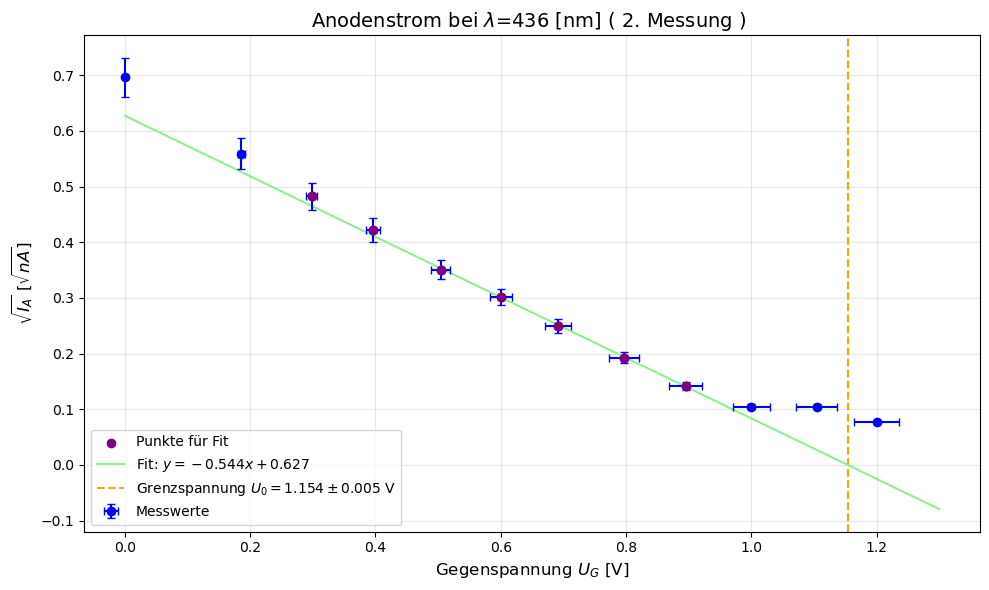

Die Grenzspannung U_0 beträgt: 1.154 ± 0.005 V
Chi-Quadrat-Wert: 0.867
Reduziertes Chi-Quadrat: 0.173


In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([1.2,1.104,1.0,0.895,0.796,0.691,0.600,0.504,0.396,0.298,0.186,0])
I_A = np.array([0.006,0.011,0.011,0.02,0.037,0.062,0.091,0.123,0.178,0.233,0.313,0.485])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [ 3, 4, 5, 6, 7, 8, 9]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=436 [nm] ( 2. Messung )  ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('436_2_photoeffekt_plot_436nm_2_messung.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


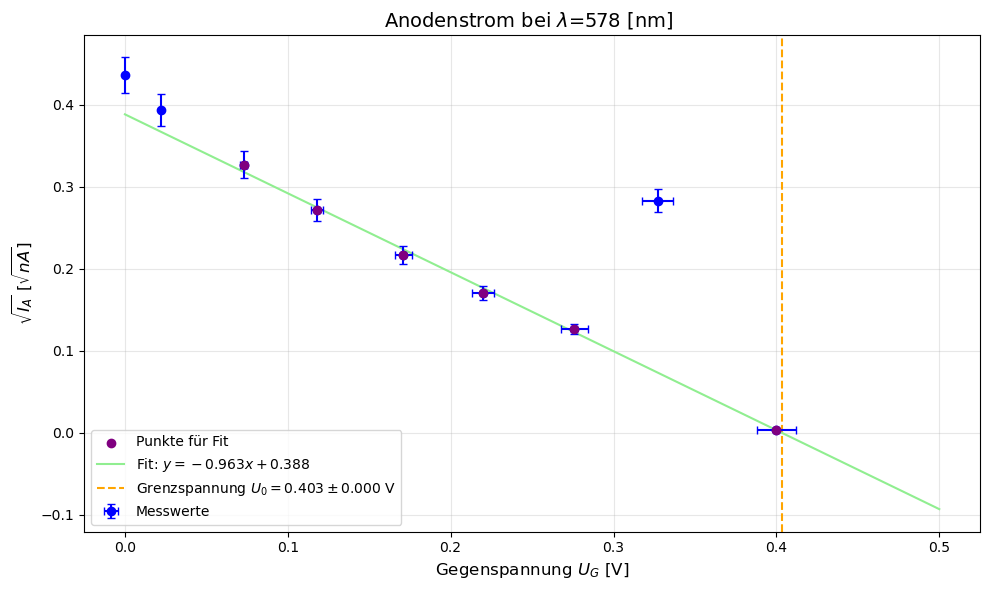

Die Grenzspannung U_0 beträgt: 0.403 ± 0.000 V
Chi-Quadrat-Wert: 1.661
Reduziertes Chi-Quadrat: 0.415


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([0.4,0.327,0.276,0.22,0.171,0.118,0.073,0.022,0])
I_A = np.array([0.00001,0.08,0.016,0.029,0.047,0.074,0.107,0.155,0.19]) #hier 1. wert eig 0 approximieren vllt 0.00001 nicht genug klein


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [0, 2, 3, 4, 5, 6,]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=578 [nm]  ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('578_photoeffekt_plot_578nm.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


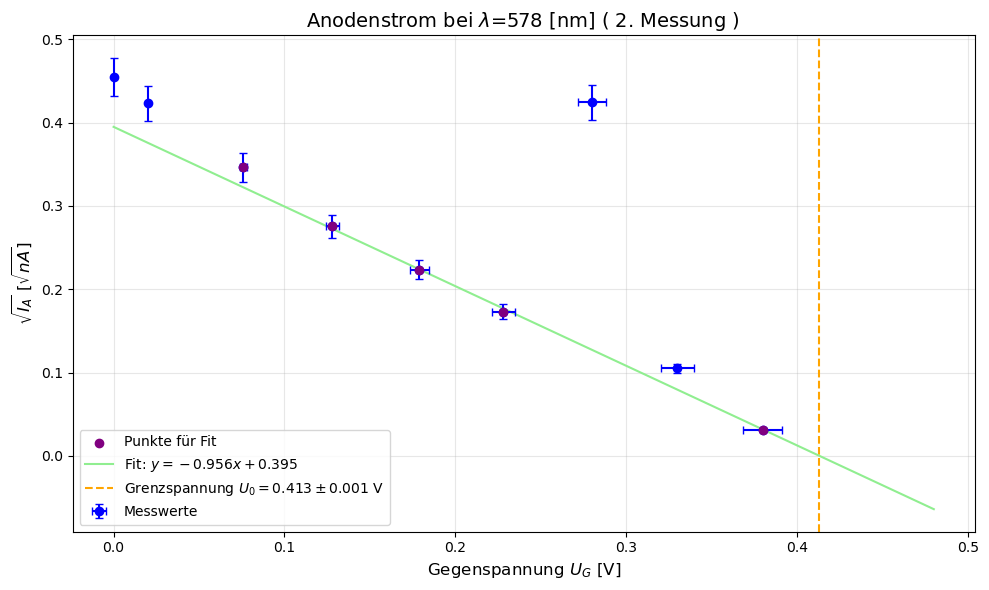

Die Grenzspannung U_0 beträgt: 0.413 ± 0.001 V
Chi-Quadrat-Wert: 2.181
Reduziertes Chi-Quadrat: 0.727


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([0.38,0.33,0.28,0.228,0.179,0.128,0.076,0.02,
0])
I_A = np.array([0.001,0.011,0.18,0.03,0.05,0.076,0.12,0.179,0.207])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [0, 3, 4, 5, 6,]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=578 [nm] ( 2. Messung ) ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('578_2_photoeffekt_plot_578nm(2_Messung).png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")


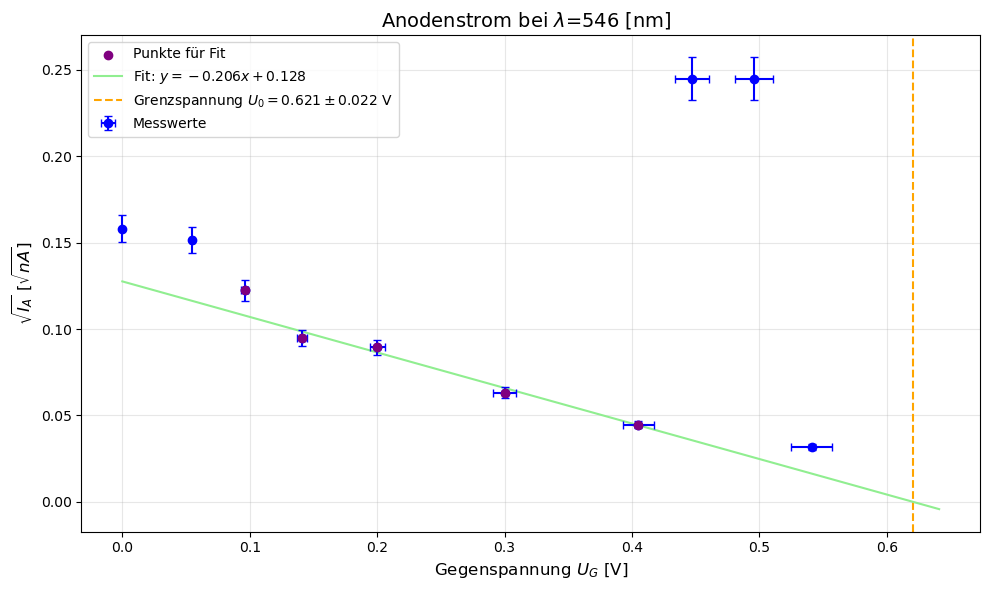

Die Grenzspannung U_0 beträgt: 0.621 ± 0.022 V
Chi-Quadrat-Wert: 7.505
Reduziertes Chi-Quadrat: 2.502


In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Messdaten: Gegenspannung U_G und Anodenstrom I_A
U_G = np.array([0.541
,0.496
,0.447
,0.405
,0.3
,0.2
,0.141
,0.096,
0.055,
0])
I_A = np.array([0.001,0.06,0.06,0.002,0.004,0.008,0.009,0.015,0.023,0.025])


# Fehlerberechnung
U_G_error = 0.03 * U_G  # 3% Fehler auf U_G
I_A_error = 0.1 * I_A  # 10% Fehler auf I_A

# Wurzel des Anodenstroms
sqrt_I_A = np.sqrt(I_A)
sqrt_I_A_error = 0.5 * I_A_error / sqrt_I_A  # Fehlerfortpflanzung für sqrt(I_A)

# Indizes der Punkte, die für den Fit verwendet werden
fit_indices = [ 3, 4, 5, 6, 7]  # Anpassen der Indizes für gewünschte Punkte
fit_U_G = U_G[fit_indices]
fit_sqrt_I_A = sqrt_I_A[fit_indices]
fit_U_G_error = U_G_error[fit_indices]
fit_sqrt_I_A_error = sqrt_I_A_error[fit_indices]

# Lineare Regression (mit Fehlergewichtung)
weights = 1 / fit_sqrt_I_A_error**2  # Gewichtung nach Fehlern
fit_params, cov_matrix = np.polyfit(fit_U_G, fit_sqrt_I_A, 1, w=weights, cov=True)
fit_line = np.poly1d(fit_params)

# Nullstelle (Grenzspannung U_0) und Fehler
U_0 = -fit_params[1] / fit_params[0]
U_0_error = np.sqrt(
    (cov_matrix[1, 1] / fit_params[0]**2) +
    ((fit_params[1]**2 * cov_matrix[0, 0]) / fit_params[0]**4) -
    (2 * fit_params[1] * cov_matrix[0, 1] / fit_params[0]**3)
)

# Berechnung des reduzierten Chi-Quadrat-Wertes
residuals = fit_sqrt_I_A - fit_line(fit_U_G)  # Residuen
chisq = np.sum((residuals / fit_sqrt_I_A_error) ** 2)  # Summe der quadrierten normierten Residuen
chisq_red = chisq / (len(fit_sqrt_I_A) - len(fit_params))  # Freiheitsgrade: Datenpunkte - Fit-Parameter

# Plot erstellen
plt.figure(figsize=(10, 6))

# Fehlerbalken und Datenpunkte
plt.errorbar(U_G, sqrt_I_A, xerr=U_G_error, yerr=sqrt_I_A_error, fmt='o', label='Messwerte', color='blue', capsize=3, zorder=5)

# Markierung der Fit-Punkte
plt.scatter(fit_U_G, fit_sqrt_I_A, color='purple', label='Punkte für Fit', zorder=6)

# Fit-Linie plotten
x_fit = np.linspace(0, np.max(U_G) + 0.1, 100)
plt.plot(x_fit, fit_line(x_fit), label=f'Fit: $y = {fit_params[0]:.3f}x + {fit_params[1]:.3f}$', color='lightgreen', zorder=4)

# Nullstelle markieren
plt.axvline(U_0, color='orange', linestyle='--', label=f'Grenzspannung $U_0 = {U_0:.3f} \pm {U_0_error:.3f}$ V')

# Plot-Details
plt.title(r'Anodenstrom bei $\lambda$=546 [nm]  ', fontsize=14)
plt.xlabel('Gegenspannung $U_G$ [V]', fontsize=12)
plt.ylabel('$\sqrt{I_A}$ [$\sqrt{nA}$]', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()

# Diagramm speichern
plt.savefig('546_photoeffekt_plot_546nm.png', dpi=300)

# Diagramm anzeigen
plt.show()

# Ergebnisse ausgeben
print(f"Die Grenzspannung U_0 beträgt: {U_0:.3f} ± {U_0_error:.3f} V")
print(f"Chi-Quadrat-Wert: {chisq:.3f}")
print(f"Reduziertes Chi-Quadrat: {chisq_red:.3f}")
